In [2]:
# Loaded dataset into a panda dataframe
import pandas as pd

In [4]:
file_path = 'price_of_diamonds.csv'
diamond_price = pd.read_csv(file_path)
diamond_price

,ID,carat,cut,colour,clarity,depth,price,x,y,P,PC
0,1,0.23,Ideal,E,SI2,61.5,326,1417.391304,5.300813,Negative,Negative
1,2,0.21,Premium,E,SI1,59.8,326,1552.380952,5.451505,Positive,Negative
2,3,0.23,Good,E,VS1,56.9,327,1421.739130,5.746924,Positve,Negative
3,4,0.29,Premium,I,VS2,62.4,334,1151.724138,5.352564,NR,Negative
4,5,0.31,Good,J,SI2,63.3,335,1080.645161,5.292259,NR,Negative
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,2757,3829.166667,45.345395,NR,SN
53936,53937,0.72,Good,D,SI1,63.1,2757,3829.166667,43.692552,SP,SN
53937,53938,0.70,Very Good,D,SI1,62.8,2757,3938.571429,43.901274,SN,SN
53938,53939,0.86,Premium,H,SI2,61.0,2757,3205.813953,45.196721,SN,SP


In [10]:
# Displated first 10 rows of the dataset
diamond_price.head(10)

,ID,carat,cut,colour,clarity,depth,price,x,y,P,PC
0,1,0.23,Ideal,E,SI2,61.5,326,1417.391304,5.300813,Negative,Negative
1,2,0.21,Premium,E,SI1,59.8,326,1552.380952,5.451505,Positive,Negative
2,3,0.23,Good,E,VS1,56.9,327,1421.739130,5.746924,Positve,Negative
3,4,0.29,Premium,I,VS2,62.4,334,1151.724138,5.352564,NR,Negative
4,5,0.31,Good,J,SI2,63.3,335,1080.645161,5.292259,NR,Negative
5,6,0.24,Very Good,J,VVS2,62.8,336,1400.000000,5.350318,SP,Negative
6,7,0.24,Very Good,I,VVS1,62.3,336,1400.000000,5.393258,SN,Negative
7,8,0.26,Very Good,H,SI1,61.9,337,1296.153846,5.444265,SN,Negative
8,9,0.22,Fair,E,VS2,65.1,337,1531.818182,5.176651,Negative,Negative
9,10,0.23,Very Good,H,VS1,59.4,338,1469.565217,5.690236,Negative,Negative


In [11]:
# Printed sammary of the dataset: data type and non null entries
diamond_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   colour   53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   P        53930 non-null  object 
 10  PC       53930 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 4.5+ MB


In [ ]:
### HANDLING MISSING VALUES

In [14]:
# Total number of missing values
diamond_price.isnull().sum()

ID          0
carat       0
cut         0
colour      0
clarity     0
depth       0
price       0
x           0
y           0
P          10
PC         10
dtype: int64

In [5]:
# Replaced missing values in specified columns with the mean of each column
diamond_price.fillna({'carat': 'mean()'}, inplace=True)

In [9]:
 # Get mode in column cut to fill the missing values
mode_cut = diamond_price['cut'].mode()[0]
mode_cut

'Ideal'

In [10]:
diamond_price['cut'] = diamond_price['cut'].fillna(mode_cut)

In [7]:
# Get mode in column color to fill the missing values
mode_P = diamond_price['P'].mode()[0]
mode_P

'Negative'

In [8]:
diamond_price['P'] = diamond_price['P'].fillna(mode_P)

In [37]:
# Get mode in column color to fill the missing values
mode_PC = diamond_price['PC'].mode()[0]
mode_PC

'Negative'

In [38]:
diamond_price['PC'] = diamond_price['PC'].fillna(mode_PC)

In [39]:
# Checked for any remaining missing values in the DataFrame
missing_values = diamond_price.isnull().sum()

(missing_values[missing_values > 0])

Series([], dtype: int64)

In [ ]:
## DATA ANALYSIS

In [50]:
# the mean for `carat`, `price`, `x`, and `y`.
diamond_price[['carat', 'price', 'x', 'y']].mean()

carat       0.797940
price    3932.799722
x        4008.394796
y          63.742880
dtype: float64

In [49]:
# the median for `carat`, `price`, `x`, and `y`.
diamond_price[['carat', 'price', 'x', 'y']].median()

carat       0.700000
price    2401.000000
x        3495.198032
y          39.001623
dtype: float64

In [11]:
# the mode for `carat`, `price`, `x`, and `y`.
diamond_price[['carat', 'price', 'x', 'y']].mode()

,carat,price,x,y
0,0.3,605,2250.0,10.0


In [ ]:
### Categorical data analysis

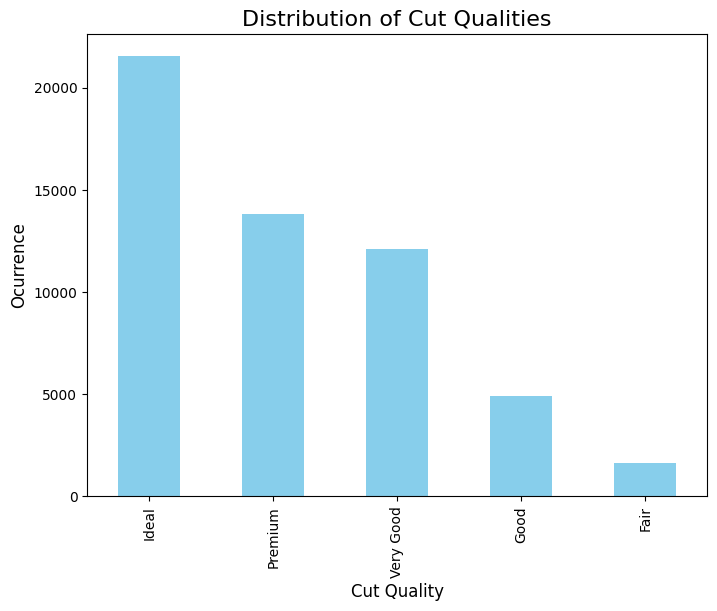

In [41]:
import matplotlib.pyplot as plt

# Count the occurrences of each 'cut' quality
cut_counts = diamond_price['cut'].value_counts()

# Created a bar plot
plt.figure(figsize=(8, 6))
cut_counts.plot(kind='bar', color='skyblue')

# Added titles and labels
plt.title('Distribution of Cut Qualities', fontsize=16)
plt.xlabel('Cut Quality', fontsize=12)
plt.ylabel('Ocurrence', fontsize=12)

# Show the plot
plt.show()

In [ ]:
## For count plots, its easier to use seaborn

C:\Users\godwin.owere\AppData\Local\Temp\ipykernel_10388\95307102.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=diamond_price, x='colour', palette='viridis')


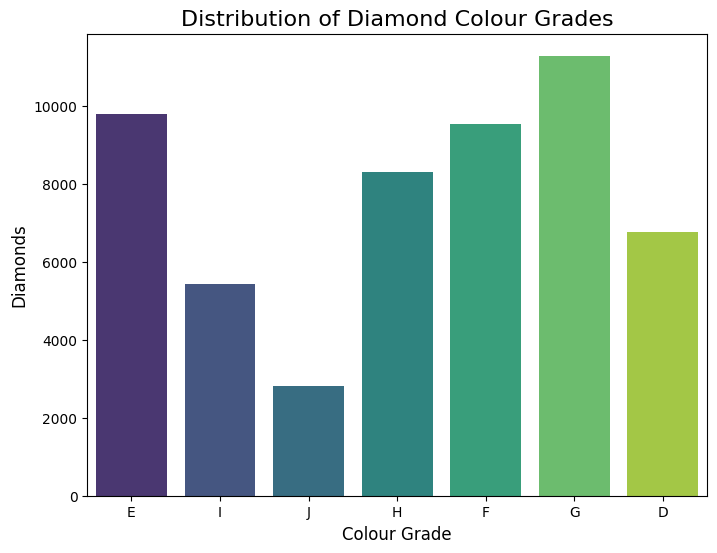

In [42]:
import seaborn as sns
# Created a count plot for the 'colour' column
plt.figure(figsize=(8, 6))
sns.countplot(data=diamond_price, x='colour', palette='viridis')

# Added titles and labels
plt.title('Distribution of Diamond Colour Grades', fontsize=16)
plt.xlabel('Colour Grade', fontsize=12)
plt.ylabel('Diamonds', fontsize=12)

plt.show()

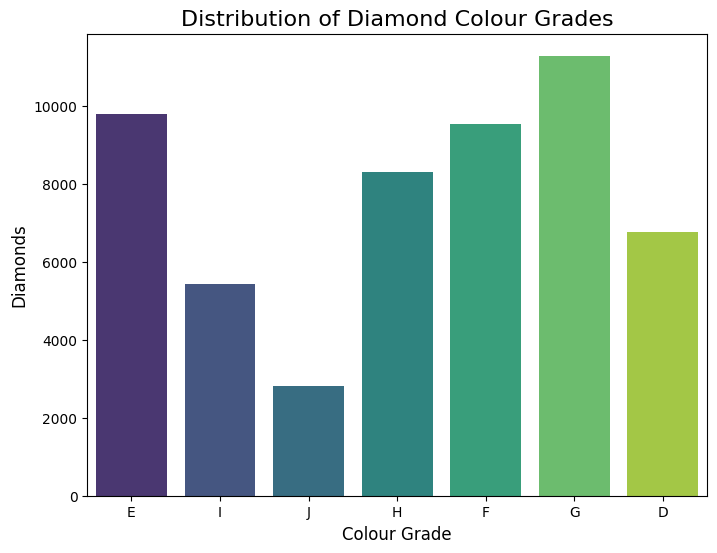

In [43]:
## Hue and Legend have bee added to the code
import seaborn as sns
# Created a count plot for the 'colour' column
plt.figure(figsize=(8, 6))
sns.countplot(data=diamond_price, x='colour', hue='colour', palette='viridis', legend=False)
# Added titles and labels
plt.title('Distribution of Diamond Colour Grades', fontsize=16)
plt.xlabel('Colour Grade', fontsize=12)
plt.ylabel('Diamonds', fontsize=12)

plt.show()

In [ ]:
## CORRELATION ANALYSIS

In [17]:
#Displayed the correlation matrix
correlation_matrix = diamond_price[['carat', 'depth', 'price', 'x', 'y']].corr()

("Correlation Matrix:")
(correlation_matrix)

,carat,depth,price,x,y
carat,1.000000,0.028224,0.921591,0.769744,0.919781
depth,0.028224,1.000000,-0.010647,-0.035669,-0.035402
price,0.921591,-0.010647,1.000000,0.912377,0.999430
x,0.769744,-0.035669,0.912377,1.000000,0.912458
y,0.919781,-0.035402,0.999430,0.912458,1.000000


<Axes: >

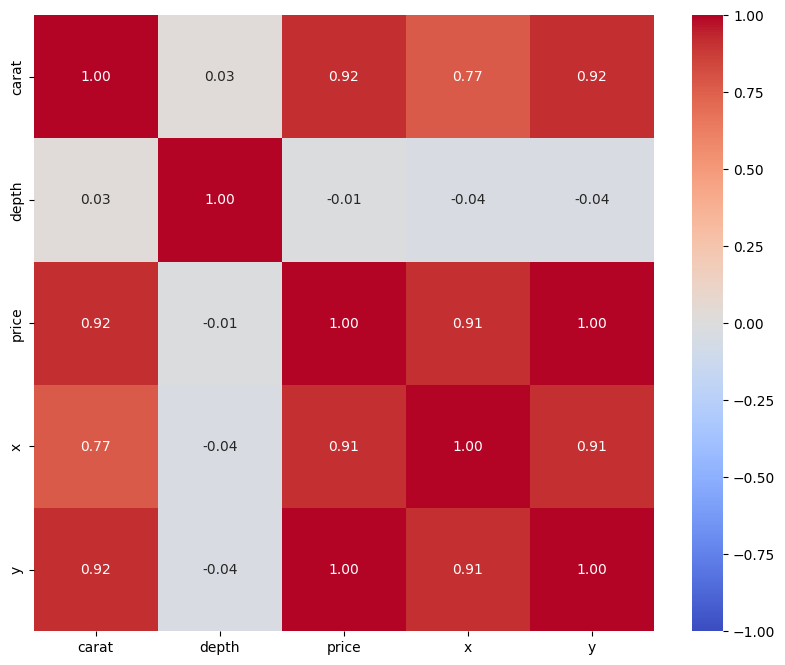

In [18]:
# Created a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')

In [ ]:
###DATA VISUALIZATION

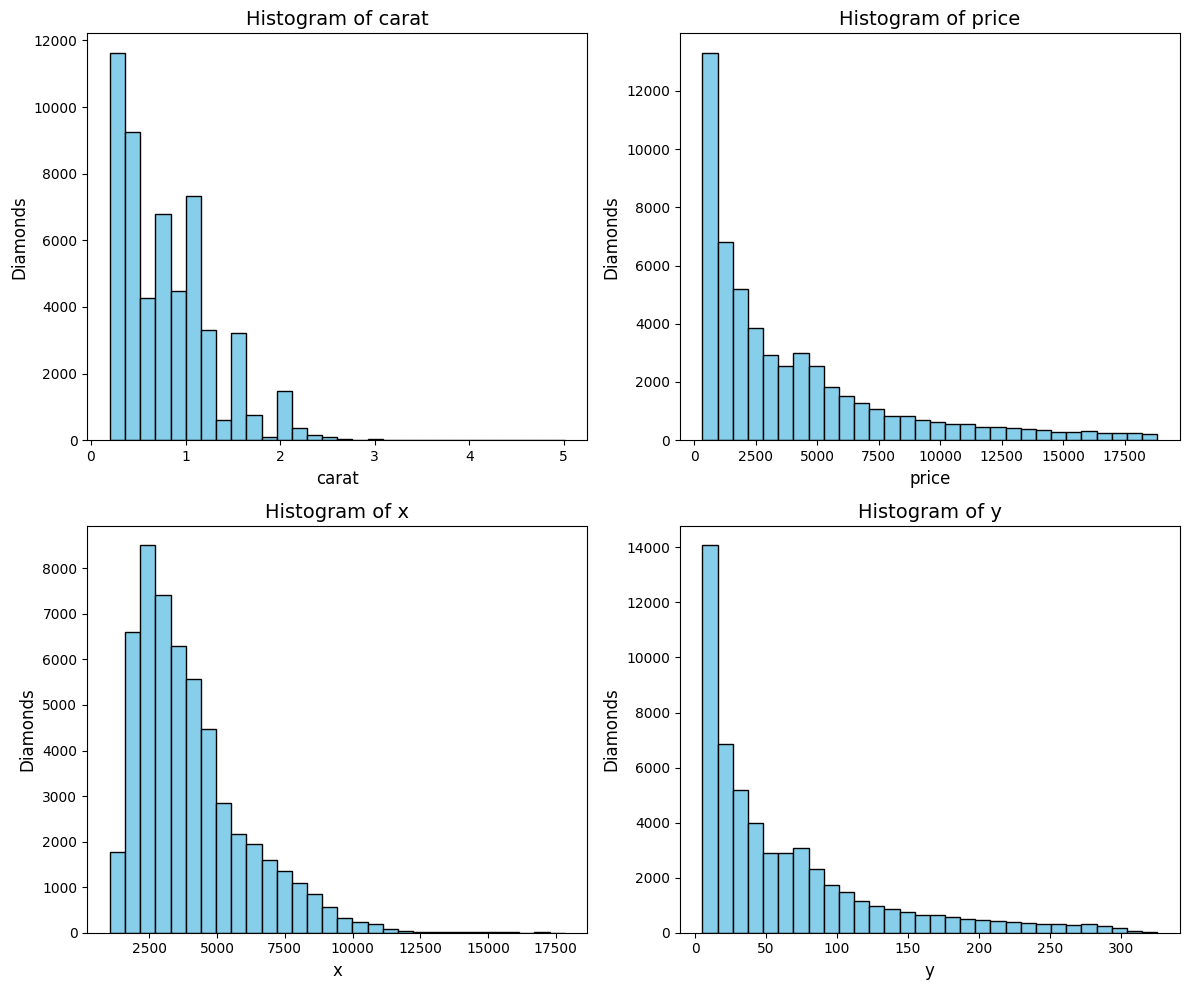

In [44]:
# Price distributions in using a histogram for columns carat, price, x and y
columns = ['carat', 'price', 'x', 'y']

plt.figure(figsize=(12, 10))

# Loop through the columns and create a histogram for each
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # Created a subplot for each column
    plt.hist(diamond_price[column].dropna(), bins=30, edgecolor='black', color='skyblue')
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Diamonds', fontsize=12)
plt.tight_layout()

C:\Users\godwin.owere\AppData\Local\Temp\ipykernel_10388\1236231230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= diamond_price, x='cut', y='price', palette='viridis')


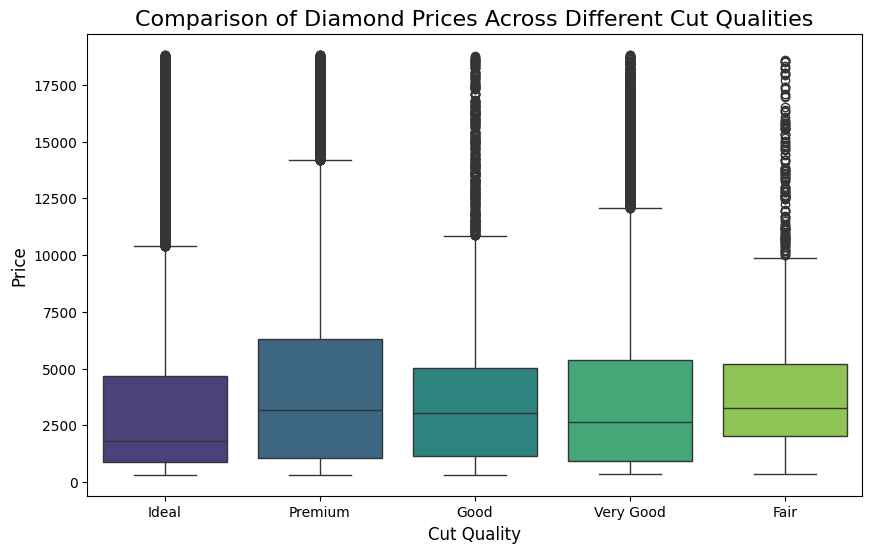

In [25]:
## Cut quality vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(data= diamond_price, x='cut', y='price', palette='viridis')

plt.title('Comparison of Diamond Prices Across Different Cut Qualities', fontsize=16)
plt.xlabel('Cut Quality', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.show()

C:\Users\godwin.owere\AppData\Local\Temp\ipykernel_10388\1665781979.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_price, x='clarity', y='price', palette='viridis')


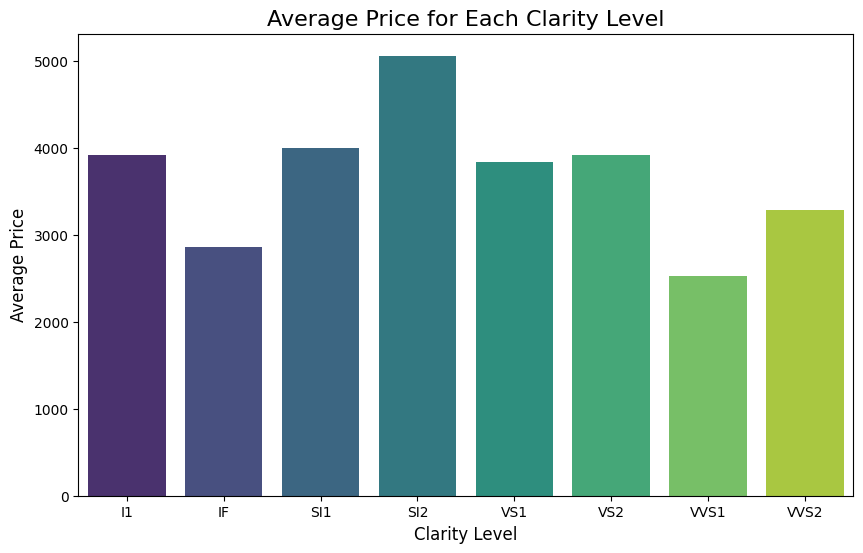

In [26]:
# Impact of clarity on Price
#Calculate the average price for each clarity level
average_price = diamond_price.groupby('clarity')['price'].mean().reset_index()

# a bar plot for the average price by clarity level
plt.figure(figsize=(10, 6))
sns.barplot(data=average_price, x='clarity', y='price', palette='viridis')

plt.title('Average Price for Each Clarity Level', fontsize=16)
plt.xlabel('Clarity Level', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

plt.show()

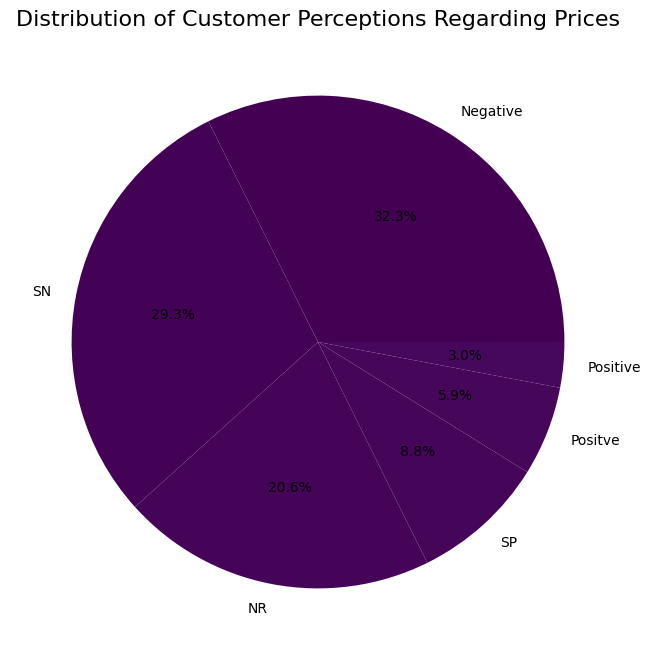

In [27]:
# Customer perceptions
# Create a pie chart
plt.figure(figsize=(8, 8))
perception_counts = diamond_price['P'].value_counts()
perception_counts
plt.pie(perception_counts, labels= perception_counts.index, autopct='%1.1f%%', colors=plt.cm.viridis(range(len(perception_counts))))

plt.title('Distribution of Customer Perceptions Regarding Prices', fontsize=16)

plt.show()

In [ ]:
## ADVANCED ANALYSIS


In [28]:
# Perception change analysis
## Analyized the relationship
# Group by customer perception and summary statistics for diamond characteristics
summary_stats = diamond_price.groupby('P').agg({
    'carat': ['mean', 'median', 'std'],
    'price': ['mean', 'median', 'std'],
    'x': ['mean', 'median', 'std'],
    'y': ['mean', 'median', 'std'],
    'depth': ['mean', 'median', 'std']
})

(summary_stats)

carat                         price                       \
              mean median       std         mean  median          std   
P                                                                       
NR        0.799759    0.7  0.477930  3931.474029  2409.0  3988.540883   
Negative  0.795962    0.7  0.469102  3929.859437  2398.0  3984.558878   
Positive  0.797323    0.7  0.469017  3907.570984  2438.5  3962.941874   
Positve   0.796580    0.7  0.473250  3930.310410  2398.5  3988.977788   
SN        0.799107    0.7  0.476306  3937.771578  2398.5  3995.569799   
SP        0.798071    0.7  0.477860  3942.586605  2407.0  4004.112890   

                    x                                    y             \
                 mean       median          std       mean     median   
P                                                                       
NR        3998.189506  3494.485903  1990.812276  63.685139  39.085766   
Negative  4014.748930  3500.000000  2028.279585  63.721562  38.979266   
Positive  3989.627337  3509.938272  1999.564553  63.317106  39.431112   
Positve   4013.451471  3512.338028  2022.587026  63.724530  39.015550   
SN        4007.221200  3492.000000  2009.496844  63.818433  38.918714   
SP        4016.893576  3505.633803  2017.054075  63.897116  39.026403   

                         depth                   
                std       mean median       std  
P                                                
NR        64.725121  61.779844   61.9  1.465809  
Negative  64.729099  61.728738   61.8  1.427136  
Positive  64.236519  61.730262   61.8  1.472906  
Positve   64.771203  61.735678   61.9  1.411434  
SN        64.859418  61.748787   61.8  1.419455  
SP        65.067255  61.772139   61.9  1.415417

C:\Users\godwin.owere\AppData\Local\Temp\ipykernel_10388\3884678494.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diamond_price, x='P', y=characteristic, palette='viridis')
C:\Users\godwin.owere\AppData\Local\Temp\ipykernel_10388\3884678494.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diamond_price, x='P', y=characteristic, palette='viridis')
C:\Users\godwin.owere\AppData\Local\Temp\ipykernel_10388\3884678494.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diamond_price, x='P', y=characteristic, palette='virid

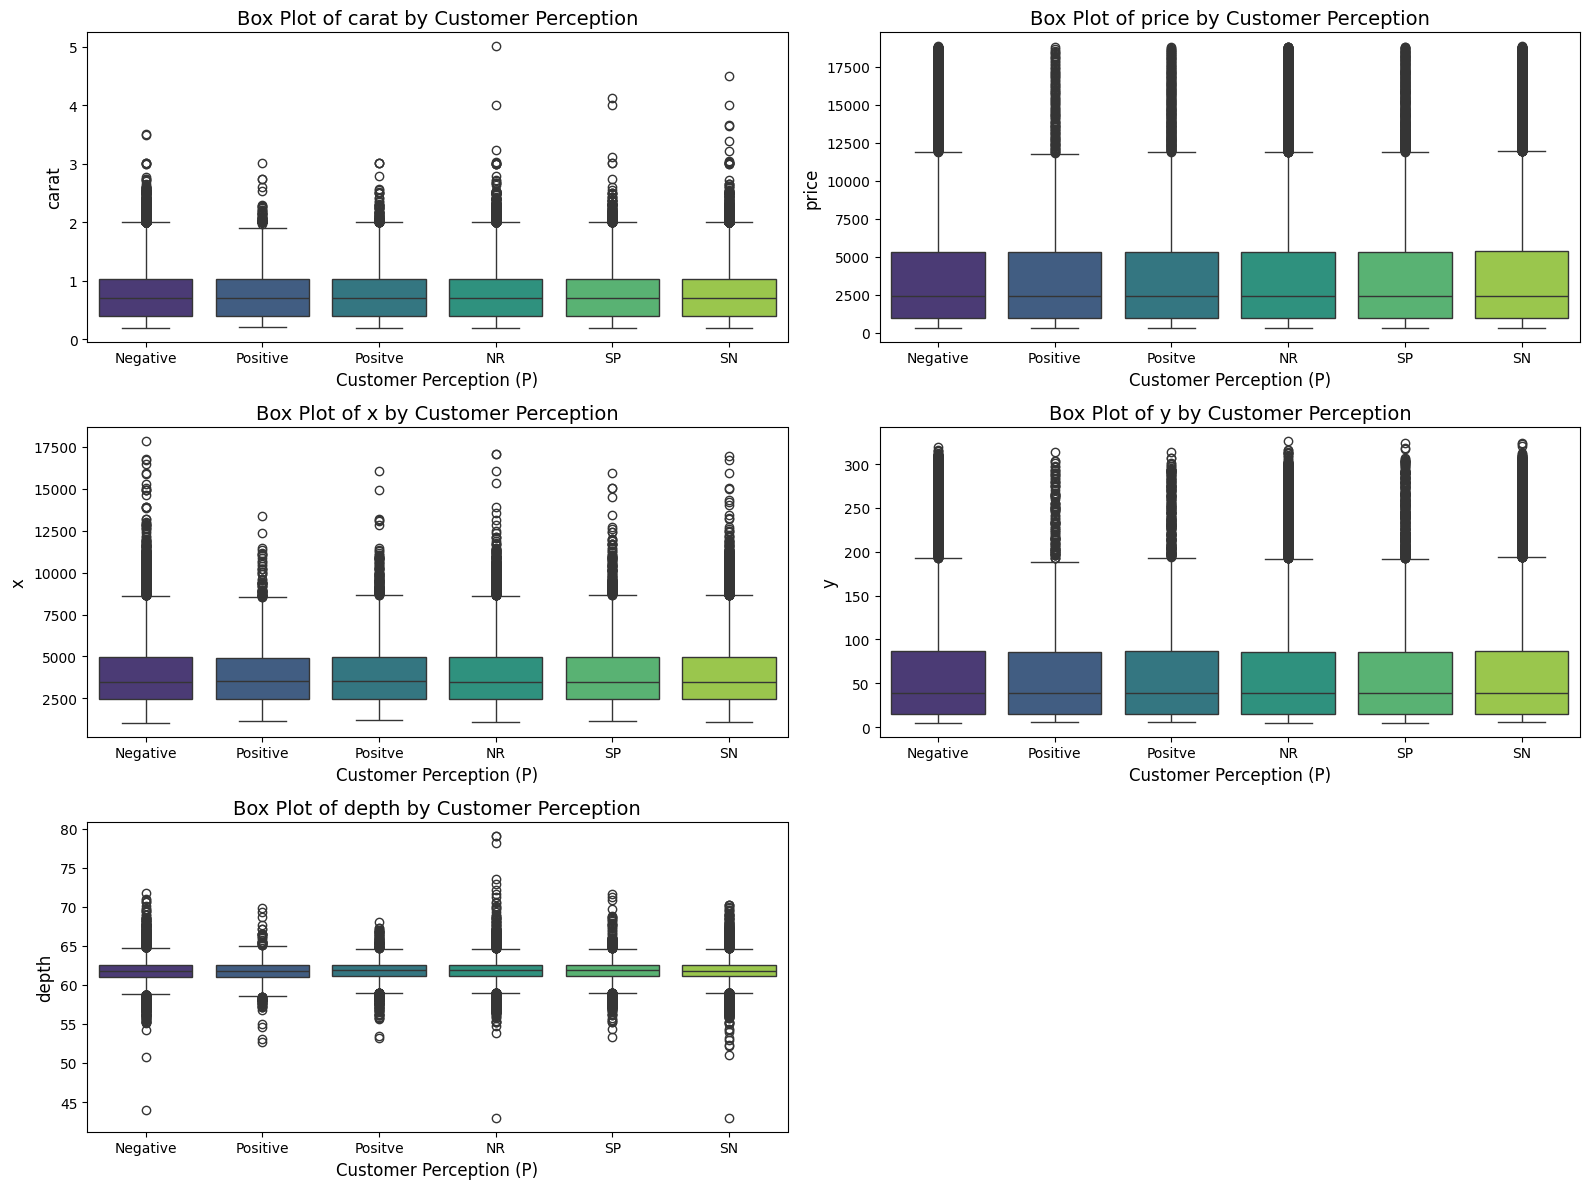

In [29]:
##Visualized the data
# Created a box plot for each characteristic by customer perception
characteristics = ['carat', 'price', 'x', 'y', 'depth']

plt.figure(figsize=(16, 12))

for i, characteristic in enumerate(characteristics, 1):
    plt.subplot(3, 2, i)  # Create a subplot for each characteristic
    sns.boxplot(data=diamond_price, x='P', y=characteristic, palette='viridis')
    plt.title(f'Box Plot of {characteristic} by Customer Perception', fontsize=14)
    plt.xlabel('Customer Perception (P)', fontsize=12)
    plt.ylabel(characteristic, fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\godwin.owere\AppData\Local\Temp\ipykernel_10388\2290412491.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=diamond_price, x='P', y=characteristic, palette='viridis')
C:\Users\godwin.owere\AppData\Local\Temp\ipykernel_10388\2290412491.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=diamond_price, x='P', y=characteristic, palette='viridis')
C:\Users\godwin.owere\AppData\Local\Temp\ipykernel_10388\2290412491.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=diamond_price, x='P', y=characteristic, palet

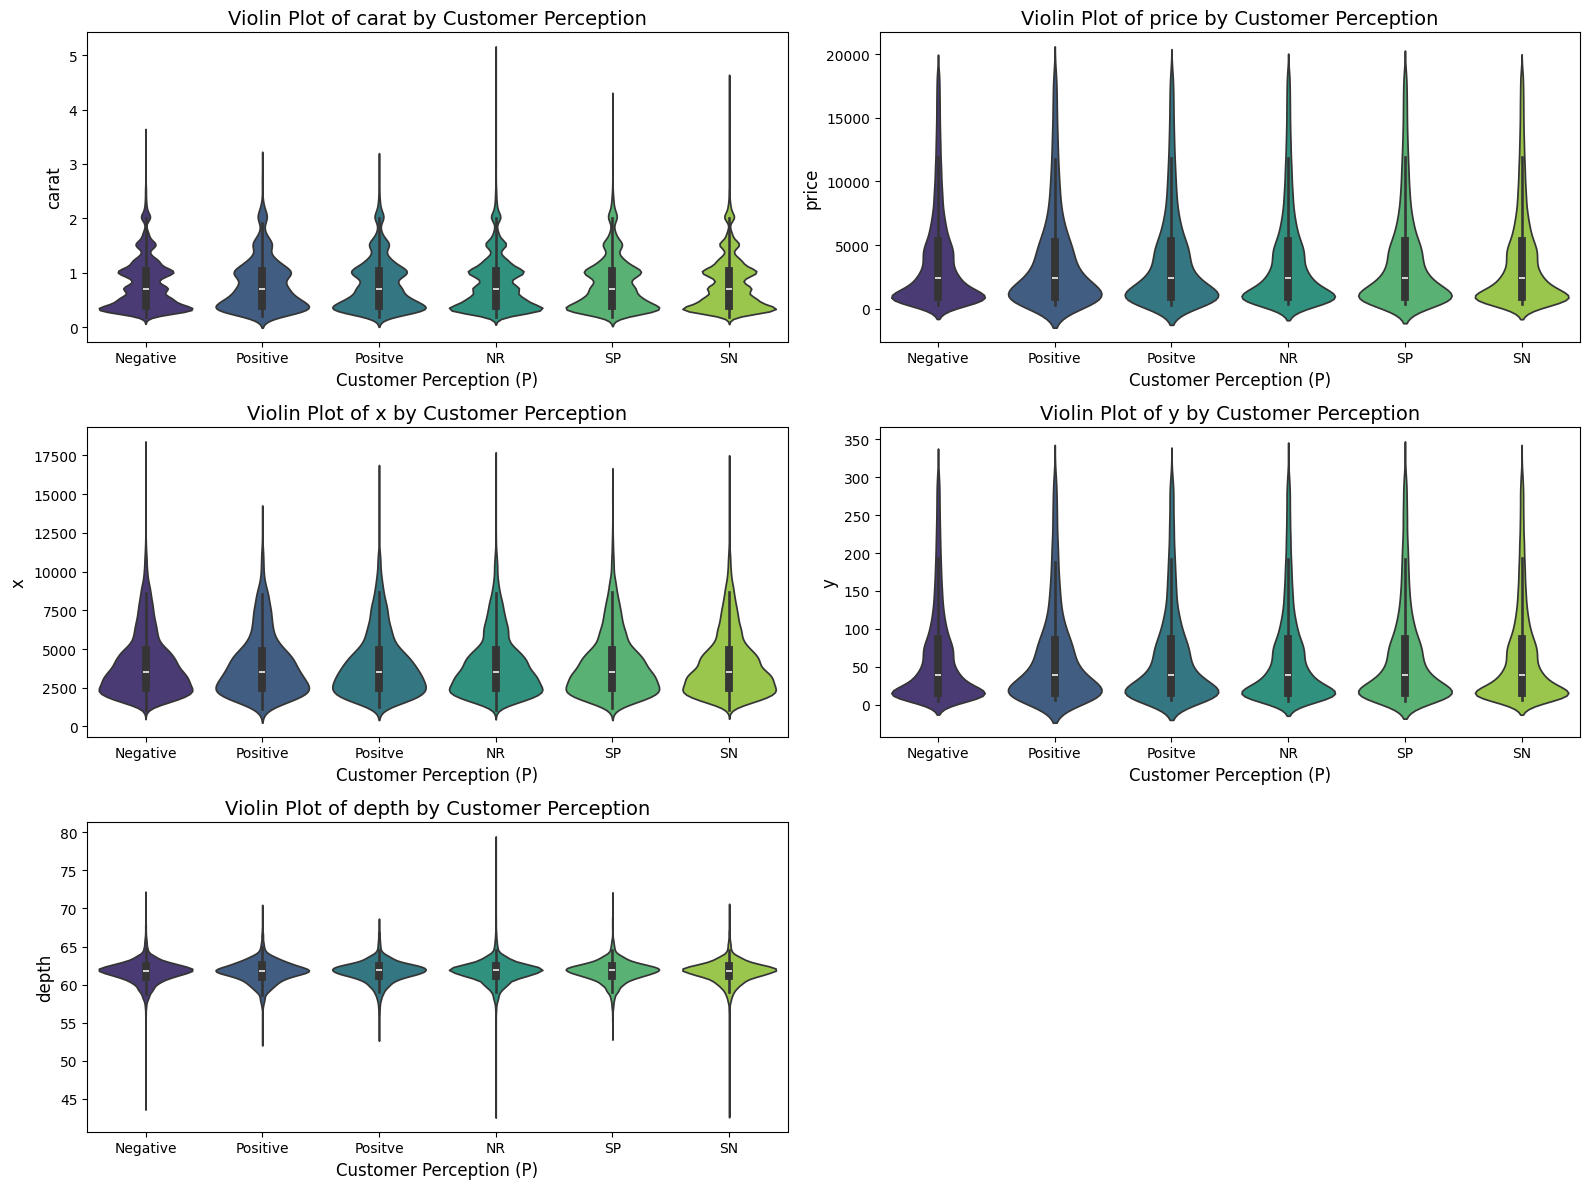

In [31]:
## Violin plots

plt.figure(figsize=(16, 12))

for i, characteristic in enumerate(characteristics, 1):
    plt.subplot(3, 2, i)  # Create a subplot for each characteristic
    sns.violinplot(data=diamond_price, x='P', y=characteristic, palette='viridis')
    plt.title(f'Violin Plot of {characteristic} by Customer Perception', fontsize=14)
    plt.xlabel('Customer Perception (P)', fontsize=12)
    plt.ylabel(characteristic, fontsize=12)

plt.tight_layout()
plt.show()

In [39]:
## Overrall Diamond value
# the 'total_value' column as the sum of 'price', 'x', and 'y'
diamond_price['total_value'] = diamond_price['price'] + diamond_price['x'] + diamond_price['y']
diamond_price['total_value']
diamond_price.head(10)

,ID,carat,cut,colour,clarity,depth,price,x,y,P,PC,total_value
0,1,0.23,Ideal,E,SI2,61.5,326,1417.391304,5.300813,Negative,Negative,1748.692117
1,2,0.21,Premium,E,SI1,59.8,326,1552.380952,5.451505,Positive,Negative,1883.832457
2,3,0.23,Good,E,VS1,56.9,327,1421.739130,5.746924,Positve,Negative,1754.486054
3,4,0.29,Premium,I,VS2,62.4,334,1151.724138,5.352564,NR,Negative,1491.076702
4,5,0.31,Good,J,SI2,63.3,335,1080.645161,5.292259,NR,Negative,1420.937420
5,6,0.24,Very Good,J,VVS2,62.8,336,1400.000000,5.350318,SP,Negative,1741.350318
6,7,0.24,Very Good,I,VVS1,62.3,336,1400.000000,5.393258,SN,Negative,1741.393258
7,8,0.26,Very Good,H,SI1,61.9,337,1296.153846,5.444265,SN,Negative,1638.598111
8,9,0.22,Fair,E,VS2,65.1,337,1531.818182,5.176651,Negative,Negative,1873.994833
9,10,0.23,Very Good,H,VS1,59.4,338,1469.565217,5.690236,Negative,Negative,1813.255453


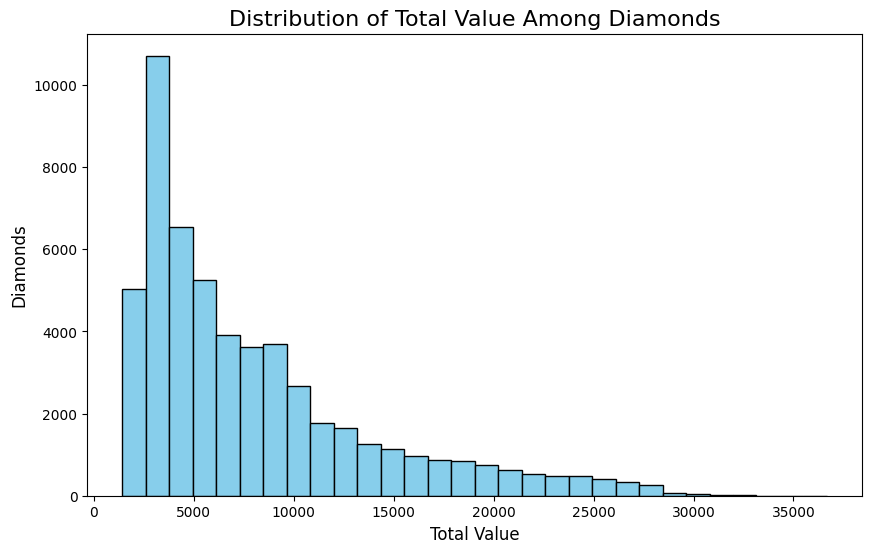

In [45]:
## Create a histogram of 'total_value'
plt.figure(figsize=(10, 6))
plt.hist(diamond_price['total_value'].dropna(), bins=30, edgecolor='black', color='skyblue')

plt.title('Distribution of Total Value Among Diamonds', fontsize=16)
plt.xlabel('Total Value', fontsize=12)
plt.ylabel('Diamonds', fontsize=12)

plt.show()